<a href="https://colab.research.google.com/github/8066-asad/Structural-Foundation-Design-and-Analysis-using-ML/blob/main/Design_of_Raft_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Please upload your Excel file:


Saving Machine learning fyp raft data.xlsx to Machine learning fyp raft data (1).xlsx

📥 Enter input values for prediction:
Number of  Columns: 30
Area Of Raft (m^2): 676
Compressive strength of Concrete Fc' (Mpa): 30
Concrete Unit Weight (kN/m^3): 15
Subgrade Modulus kN/m/m^2: 18000
Column Area (m^2): 0.4356
Maximum Axial Load on Column in kN: 2000
Total Axial load on Column (kN): 30000
Thickness of Raft (mm): 800
Preffered Dia of Bars (mm) in Bottom direction X direction: 12
Preffered Dia of Bars (mm) X Top direction: 16
Preffered Dia of Bars (mm) Bottom Y direction: 12
Preffered Dia of Bars (mm) Top Y direction: 16


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


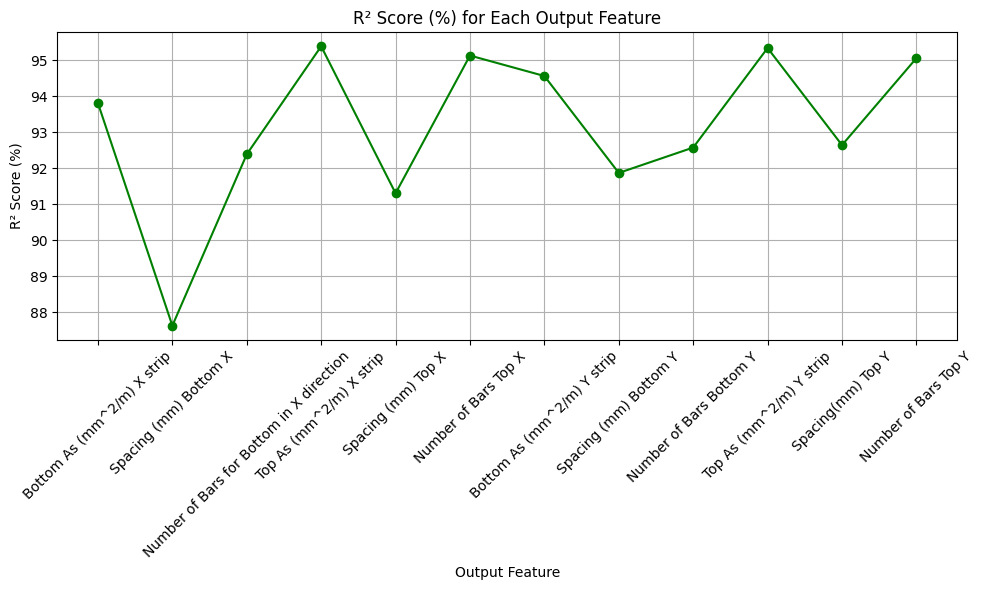

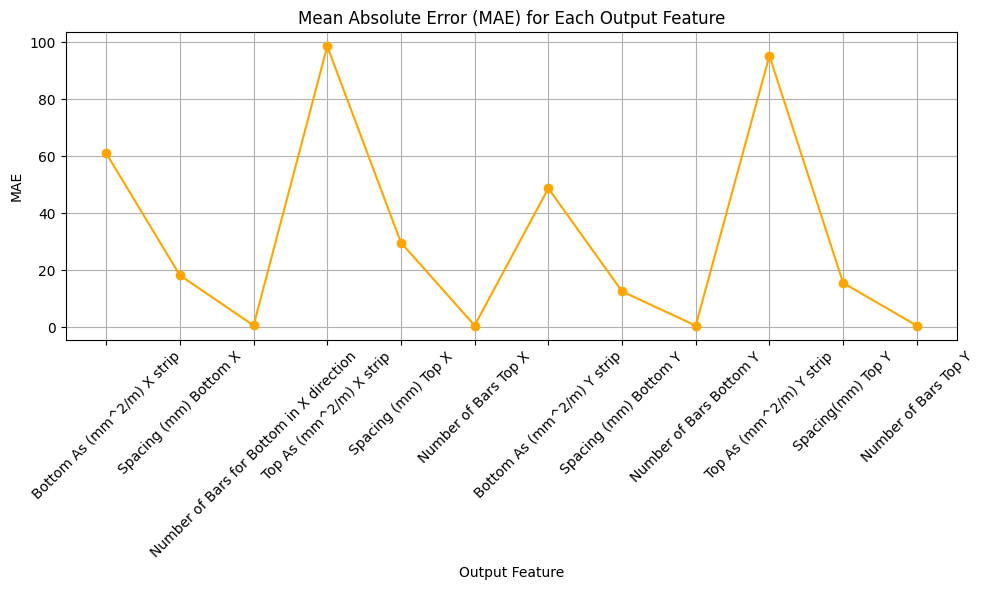

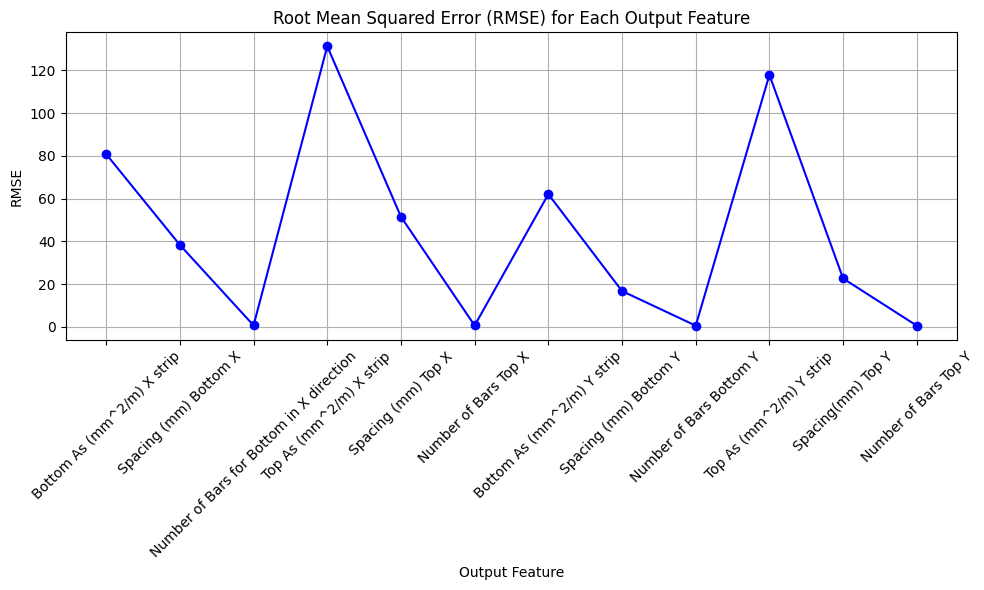

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📤 Predicted Reinforcement Outputs:
Bottom As (mm^2/m) X strip: 690.77
Spacing (mm) Bottom X: 150
Number of Bars for Bottom in X direction: 7
Top As (mm^2/m) X strip: 997.35
Spacing (mm) Top X: 180
Number of Bars Top X: 5
Bottom As (mm^2/m) Y strip: 592.88
Spacing (mm) Bottom Y: 185
Number of Bars Bottom Y: 6
Top As (mm^2/m) Y strip: 923.95
Spacing(mm) Top Y: 220
Number of Bars Top Y: 5


In [ ]:
# -------------------- STEP 0: Install Dependencies --------------------
!pip install openpyxl scikit-learn matplotlib seaborn --quiet

# -------------------- STEP 1: Import Libraries --------------------
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from google.colab import files

# -------------------- STEP 2: Upload Dataset --------------------
print("📂 Please upload your Excel file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)
df.columns = df.columns.str.strip()

# -------------------- STEP 3: Define Inputs and Outputs --------------------
X = df[[
    'Number of  Columns', 'Area Of Raft (m^2)', "Compressive strength of Concrete Fc' (Mpa)",
    'Concrete Unit Weight (kN/m^3)', 'Subgrade Modulus kN/m/m^2',
    'Column Area (m^2)', 'Maximum Axial Load on Column in kN',
    'Total Axial load on Column (kN)', 'Thickness of Raft (mm)',
    'Preffered Dia of Bars (mm) in Bottom direction X direction',
    'Preffered Dia of Bars (mm) X Top direction',
    'Preffered Dia of Bars (mm) Bottom Y direction',
    'Preffered Dia of Bars (mm) Top Y direction'
]]

# Output (REMOVED Preferred Dia columns)
y = df[[
    'Bottom As (mm^2/m) X strip', 'Spacing (mm) Bottom X',
    'Number of Bars for Bottom in X direction',

    'Top As (mm^2/m) X strip', 'Spacing (mm) Top X',
    'Number of Bars Top X',

    'Bottom As (mm^2/m) Y strip', 'Spacing (mm) Bottom Y',
    'Number of Bars Bottom Y',

    'Top As (mm^2/m) Y strip', 'Spacing(mm) Top Y',
    'Number of Bars Top Y'
]]

# -------------------- STEP 4: Scale Inputs --------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- STEP 5: Train Random Forest Model --------------------
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# -------------------- STEP 6: Define Utility Functions --------------------

def round_spacing(val):
    return int(math.floor(val / 5.0) * 5)

print("\n📥 Enter input values for prediction:")
user_input = []
for col in X.columns:
    val = float(input(f"{col}: "))
    user_input.append(val)

user_scaled = scaler.transform([user_input])
prediction = model.predict(user_scaled)[0]


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y and y_pred are your actual and predicted values respectively
r2_scores = []
mae_scores = []
rmse_scores = []

for i in range(y.shape[1]):
    r2 = r2_score(y.iloc[:, i], y_pred[:, i]) * 100  # R² as percentage
    mae = mean_absolute_error(y.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y.iloc[:, i], y_pred[:, i]))

    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
import matplotlib.pyplot as plt

output_features = y.columns.tolist()

# Plot R² Scores
plt.figure(figsize=(8, 6))
plt.plot(output_features, r2_scores, marker='o', color='green')
plt.title('R² Score (%) for Each Output Feature')
plt.ylabel('R² Score (%)')
plt.xlabel('Output Feature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(8, 6))
plt.plot(output_features, mae_scores, marker='o', color='orange')
plt.title('Mean Absolute Error (MAE) for Each Output Feature')
plt.ylabel('MAE')
plt.xlabel('Output Feature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(8, 6))
plt.plot(output_features, rmse_scores, marker='o', color='blue')
plt.title('Root Mean Squared Error (RMSE) for Each Output Feature')
plt.ylabel('RMSE')
plt.xlabel('Output Feature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# -------------------- STEP 6: Save Model --------------------
import joblib

joblib.dump(model, 'raft_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
files.download('raft_model.pkl')
files.download('scaler.pkl')
for i, col in enumerate(y.columns):
    val = prediction[i]
    if "Spacing" in col:
        val = round_spacing(val)
    elif "Number of Bars" in col:
        val = int(round(val))
    else:
        val = round(val, 2)
print("\n📤 Predicted Reinforcement Outputs:")
for i, col in enumerate(y.columns):
    val = prediction[i]
    if "Spacing" in col:
        val = round_spacing(val)
    elif "Number of Bars" in col:
        val = int(round(val))
    else:
        val = round(val, 2)
    print(f"{col}: {val}")